<a href="https://colab.research.google.com/github/shreyash26cho/ML/blob/main/exp8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.cluster import KMeans

In [38]:
df=pd .read_csv('/content/iris.csv')
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


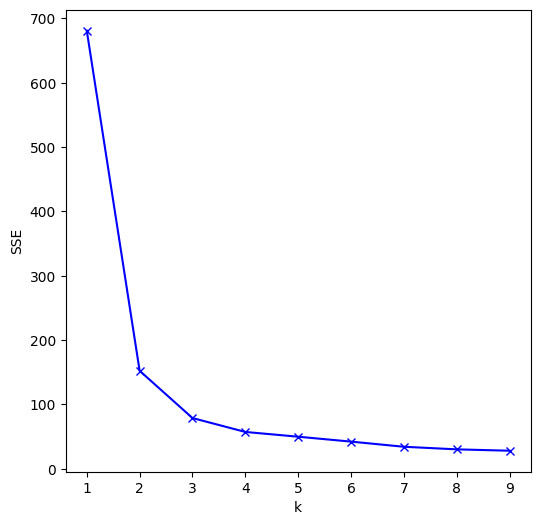

In [39]:
sse = []
K_range = range(1, 10)
df_for_clustering = df.drop('species', axis=1)

for k in K_range:
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(df_for_clustering)
  sse.append(kmeans.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(K_range, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

In [40]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(df_for_clustering)
df['cluster'] = kmeans_model.labels_
print(df.head(70))

    sepal_length  sepal_width  petal_length  petal_width     species  cluster
0            5.1          3.5           1.4          0.2      setosa        1
1            4.9          3.0           1.4          0.2      setosa        1
2            4.7          3.2           1.3          0.2      setosa        1
3            4.6          3.1           1.5          0.2      setosa        1
4            5.0          3.6           1.4          0.2      setosa        1
..           ...          ...           ...          ...         ...      ...
65           6.7          3.1           4.4          1.4  versicolor        2
66           5.6          3.0           4.5          1.5  versicolor        2
67           5.8          2.7           4.1          1.0  versicolor        2
68           6.2          2.2           4.5          1.5  versicolor        2
69           5.6          2.5           3.9          1.1  versicolor        2

[70 rows x 6 columns]


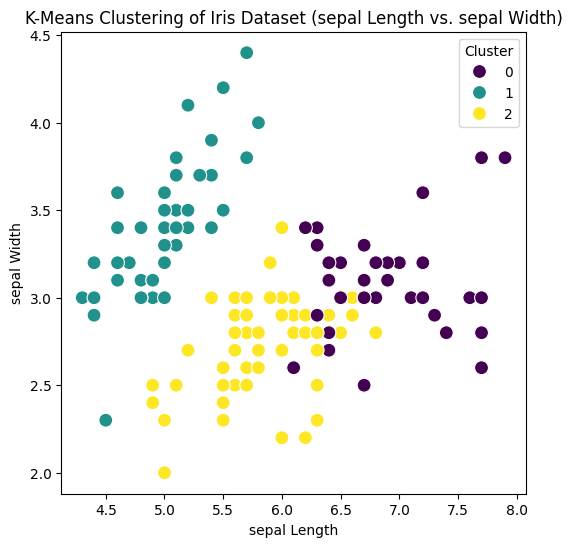

In [46]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='cluster', data=df, palette='viridis', s=100)
plt.title('K-Means Clustering of Iris Dataset (sepal Length vs. sepal Width)')
plt.xlabel('sepal Length')
plt.ylabel('sepal Width')
plt.legend(title='Cluster')
plt.show()

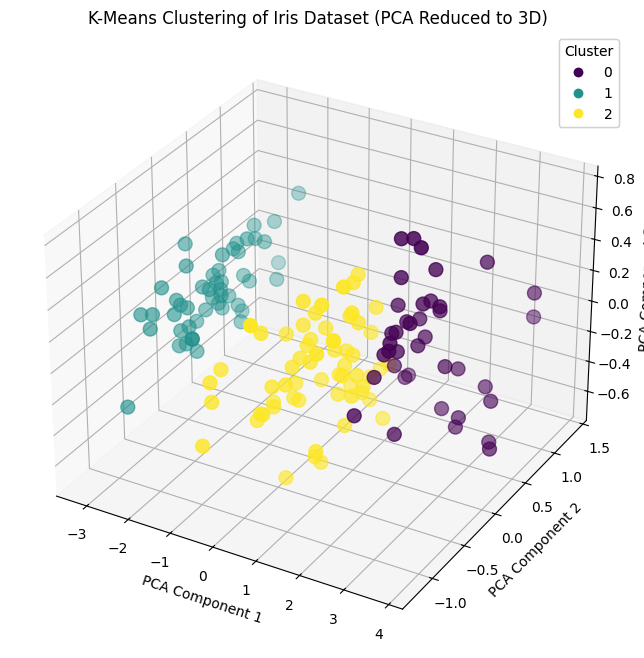

In [48]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Initialize PCA to reduce to 3 components
pca_3d = PCA(n_components=3)

# Fit and transform the data (using the dataframe without the 'species' column)
df_pca_3d = pca_3d.fit_transform(df_for_clustering)

# Add the cluster labels
df_pca_3d = pd.DataFrame(df_pca_3d, columns=['PCA Component 1', 'PCA Component 2', 'PCA Component 3'])
df_pca_3d['cluster'] = df['cluster']

# Visualize in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_pca_3d['PCA Component 1'], df_pca_3d['PCA Component 2'], df_pca_3d['PCA Component 3'], c=df_pca_3d['cluster'], cmap='viridis', s=100)

ax.set_title('K-Means Clustering of Iris Dataset (PCA Reduced to 3D)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Add a color bar
legend = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend)


plt.show()

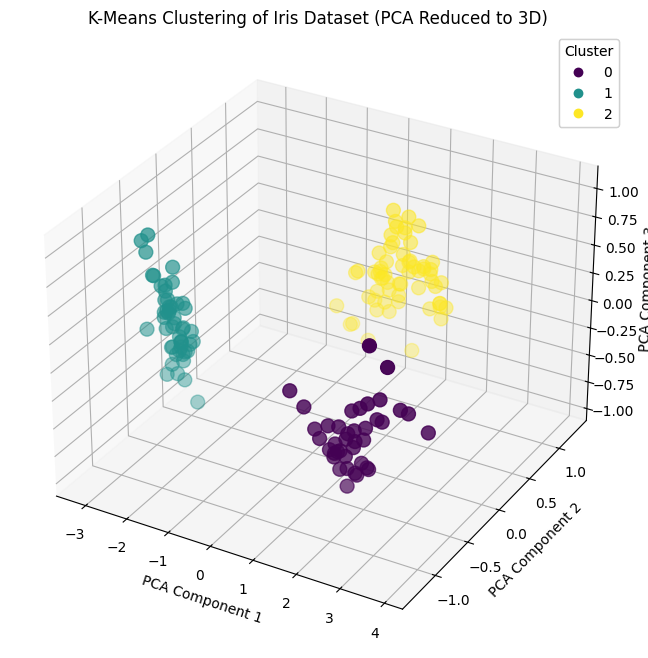

In [50]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Initialize PCA to reduce to 3 components
pca_3d = PCA(n_components=3)

# Fit and transform the data (using the dataframe without the 'species' column)
df_for_clustering = df.drop('species', axis=1)
df_pca_3d = pca_3d.fit_transform(df_for_clustering)

# Add the cluster labels
df_pca_3d = pd.DataFrame(df_pca_3d, columns=['PCA Component 1', 'PCA Component 2', 'PCA Component 3'])
df_pca_3d['cluster'] = df['cluster']

# Visualize in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_pca_3d['PCA Component 1'], df_pca_3d['PCA Component 2'], df_pca_3d['PCA Component 3'], c=df_pca_3d['cluster'], cmap='viridis', s=100)

ax.set_title('K-Means Clustering of Iris Dataset (PCA Reduced to 3D)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Add a color bar
legend = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend)


plt.show()